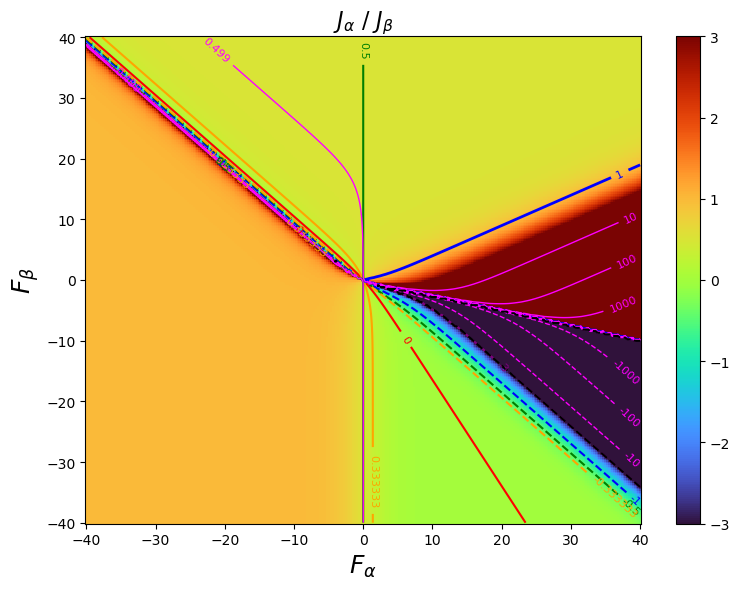

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy.ma as ma


def safe_exp(x):
    return np.exp(np.clip(x, -100, 100))

def J_ratio(f_a, f_b):
    numerator = (np.sinh(f_a/2) +
                 2*(safe_exp((-2*f_a + f_b)/6) +
                    safe_exp((-f_a - f_b)/6)) * np.sinh((f_a + f_b)/2))
    
    denominator = (4*np.cosh((f_a + f_b)/6) * np.sinh(f_b/2) +
                   2*(safe_exp((-2*f_a + f_b)/6) +
                      safe_exp((-f_a - f_b)/6)) * np.sinh((f_a + f_b)/2))
    
    return numerator / denominator

f_a_min, f_a_max = -40, 40
f_b_min, f_b_max = -40, 40
resolution = 300

f_a_vals = np.linspace(f_a_min, f_a_max, resolution)
f_b_vals = np.linspace(f_b_min, f_b_max, resolution)
FA, FB = np.meshgrid(f_a_vals, f_b_vals)

Z = J_ratio(FA, FB)


Z_clipped = np.clip(Z, -3, 3)

plt.figure(figsize=(8, 6))
heatmap = plt.pcolormesh(
    FA, FB, Z_clipped,
    shading='auto',
    cmap='turbo',
    norm=Normalize(vmin=-3, vmax=3)
)
plt.colorbar(heatmap, label=None)

main_levels = [-1, -0.5, -1/3, 0, 1/3, 0.5, 1]
colors_map = {
    0: 'red',
    -1: 'blue', 1: 'blue',
    -0.5: 'green', 0.5: 'green',
    -1/3: 'orange', 1/3: 'orange'
}




for level in main_levels:
    if level == 1:
        continue
    cs = plt.contour(FA, FB, Z_clipped, levels=[level], colors=colors_map[level], linewidths=1.5)
    plt.clabel(cs, fmt='%g', fontsize=8)

Z_masked_for_1 = np.copy(Z_clipped)
Z_masked_for_1[(FA < 0) | (FA > 40)] = np.nan  # mask outside [0,40]
cs_neg3 = plt.contour(FA, FB, Z_masked_for_1, levels=[-3], colors='purple', linewidths=1.5)
plt.clabel(cs_neg3, fmt='%g', fontsize=8)

cs_1 = plt.contour(FA, FB, Z_masked_for_1, levels=[1], colors=colors_map[1], linewidths=2)
plt.clabel(cs_1, fmt='%g', fontsize=8)

extra_levels = [0.499, -1e+01, -1e+02, -1e+03, 1e+01, 1e+02, 1e+03]
extra_levels_sorted = sorted(extra_levels)
cs_extra = plt.contour(FA, FB, Z, levels=extra_levels_sorted, colors='magenta', linewidths=1)
plt.clabel(cs_extra, fmt='%g', fontsize=8)

cs_pos3 = plt.contour(FA, FB, Z_clipped, levels=[3], colors='black', linewidths=1.5, linestyles='dashed')
cs_neg3 = plt.contour(FA, FB, Z_clipped, levels=[-3], colors='black', linewidths=1.5, linestyles='dashed')

big_val = 1e6
pos_inf_mask = Z > big_val
neg_inf_mask = Z < -big_val

plt.contour(FA, FB, pos_inf_mask, levels=[0.5], colors='magenta', linewidths=2, linestyles='dashed')
plt.contour(FA, FB, neg_inf_mask, levels=[0.5], colors='cyan', linewidths=2, linestyles='dashed')

plt.xlabel(r"$F_{\alpha}$", fontsize=18)
plt.ylabel(r"$F_{\beta}$", fontsize=18)
plt.title(r'$J_{\alpha}$ / $J_{\beta}$', fontsize=16)
plt.tight_layout()
plt.savefig(r'C:\Users\Alireza\Downloads\contour_plot_awesomated.jpeg', format='jpeg', dpi=300)
plt.show()
